## Nível 1: Análise Exploratória (EDA) e Insights

##### 1. Carregamento dos dados

In [2]:
#Import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Configuração do estilo dos gráficos
sns.set_theme(style="whitegrid")  # Usando o tema moderno do Seaborn
plt.style.use('seaborn-v0_8')     # Usando o estilo mais recente do Seaborn

# Carregar o dataset
df = pd.read_csv('../dataset/sample_superstore.csv', encoding='ISO-8859-1')

# Visualizar as primeiras linhas
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##### 2. Tratamento e preparação dos dados

In [13]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

# Verificar tipos de dados
print("\nTipos de dados:")
print(df.info())

# Converter 'Order Date' e 'Ship Date' para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Adicionar uma coluna de 'Year' e 'Month' para análise temporal
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

Valores nulos por coluna:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Year             0
Month            0
dtype: int64

Tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object 

#### 3. Análise explortória com gráficos

##### 3.1 Distribuição de vendas

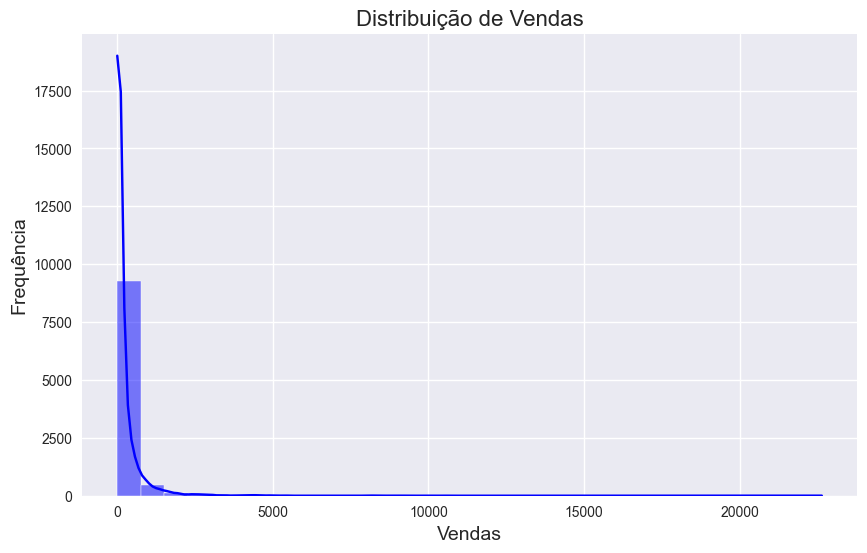

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Vendas', fontsize=16)
plt.xlabel('Vendas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()

##### Insight 1: A maioria das vendas está concentrada em valores baixos (abaixo de 500), com uma cauda longa para vendas maiores. Isso indica que a loja tem muitos pedidos de baixo valor e poucos pedidos de alto valor.

##### 3.2 Vendas por categoria de produto

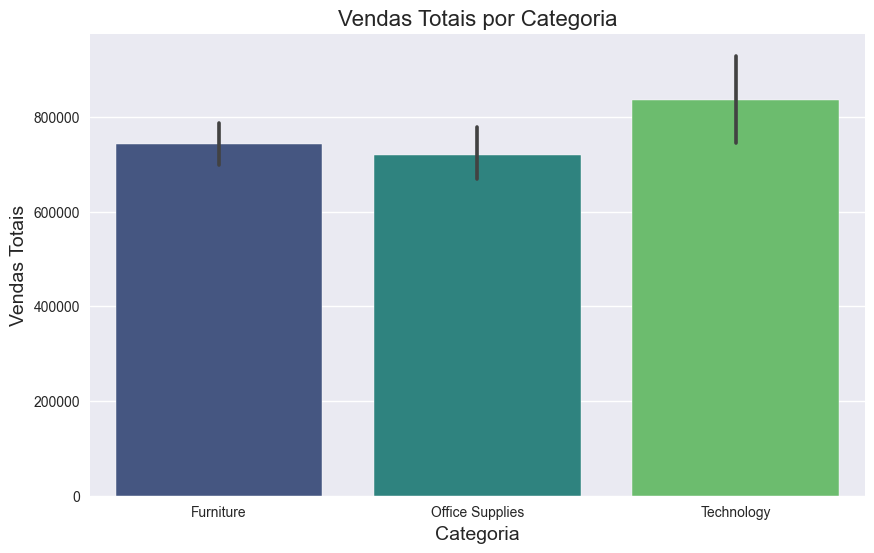

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, hue='Category', palette='viridis')
plt.title('Vendas Totais por Categoria', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Vendas Totais', fontsize=14)
plt.show()

##### Insight 2: A categoria Technology tem o maior volume de vendas, seguida por Furniture e Office Supplies. Isso sugere que produtos de tecnologia são os mais rentáveis.

##### 3.3 Vendas ao Longo do Tempo (Análise Temporal)

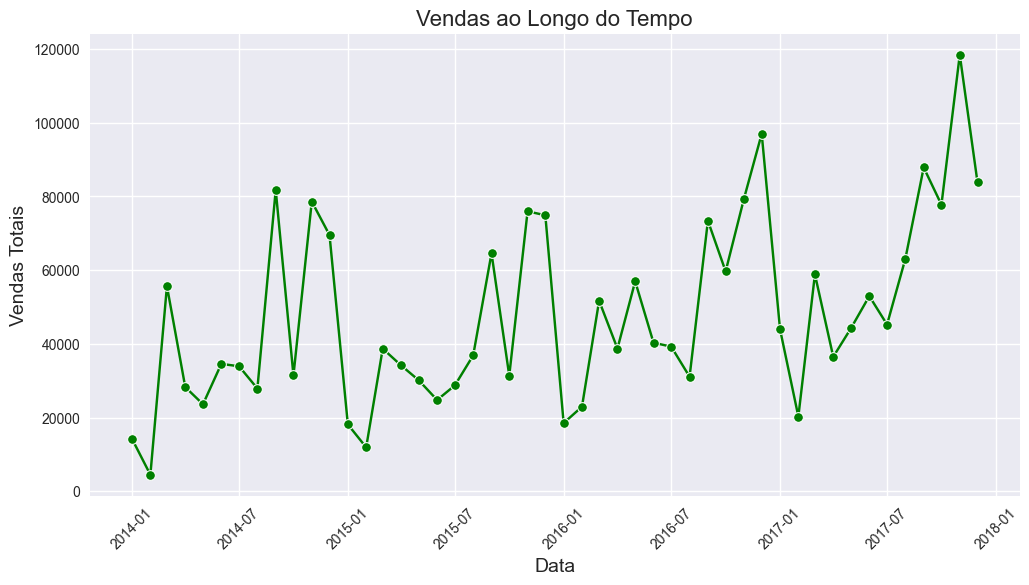

In [19]:
# Agrupar vendas por ano e mês
sales_over_time = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Criar uma coluna de data para o eixo x
sales_over_time['Date'] = pd.to_datetime(sales_over_time[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=sales_over_time, marker='o', color='green')
plt.title('Vendas ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vendas Totais', fontsize=14)
plt.xticks(rotation=45)
plt.show()

##### Insight 3: Há uma tendência de crescimento nas vendas ao longo do tempo, com picos em determinados meses (possivelmente devido a promoções ou sazonalidade).

#### 3.4 Correlação entre Variáveis

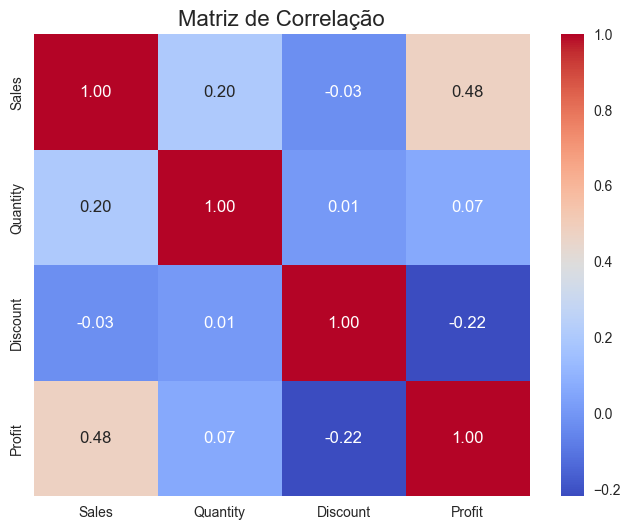

In [20]:
# Calcular a matriz de correlação
corr = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

##### Insight 4: Há uma correlação positiva moderada entre Sales e Profit (0.48), indicando que vendas mais altas tendem a gerar mais lucro. No entanto, Discount tem uma correlação negativa com Profit (-0.22), sugerindo que descontos excessivos podem reduzir a lucratividade.

##### 3.5 Distribuição de Lucro por Subcategoria

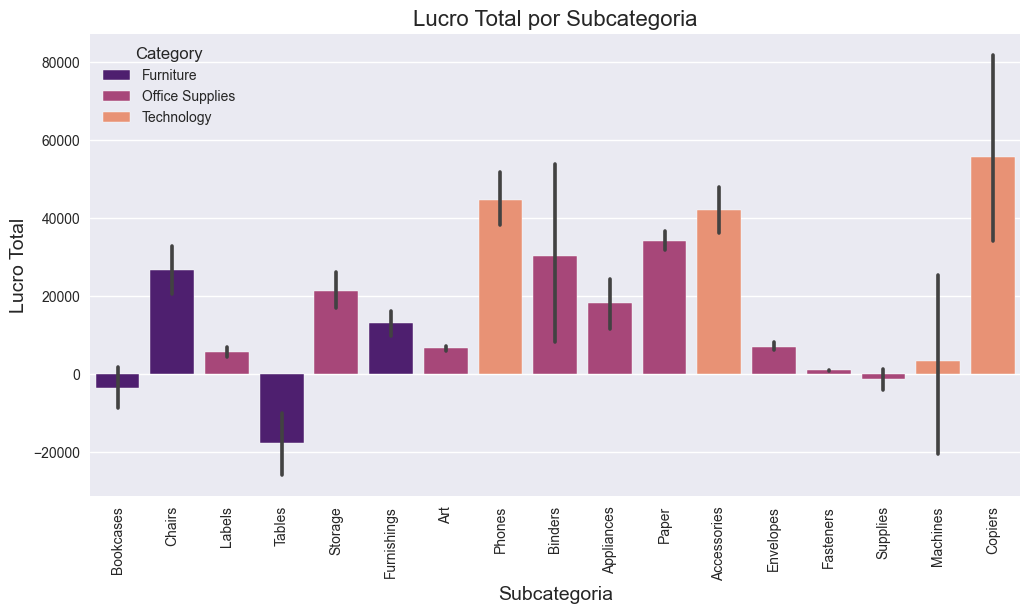

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit', data=df, estimator=sum, hue='Category', palette='magma')
plt.title('Lucro Total por Subcategoria', fontsize=16)
plt.xlabel('Subcategoria', fontsize=14)
plt.ylabel('Lucro Total', fontsize=14)
plt.xticks(rotation=90)
plt.show()

##### Insight 5: Subcategorias como Copiers e Phones têm os maiores lucros, enquanto Tables e Bookcases têm lucros negativos. Isso pode indicar problemas de precificação ou custos elevados nessas subcategorias.